In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2


In [ ]:
train_imgs = []
labels = []
directory = r"C:\Users\mahek\mahek\.ipynb_checkpoints\Train"
categories = os.listdir(directory)
for folder in categories:
    categories_directory = f"C:/Users/mahek/mahek/.ipynb_checkpoints/Train/{folder}"
    for file_n in os.listdir(categories_directory):
        image_path = f"C:/Users/mahek/mahek/.ipynb_checkpoints/Train/{folder}/{file_n}"
        image = cv2.imread(image_path)
        train_imgs.append(image.flatten())
        class_name = os.path.basename(categories_directory).split('/')[-1]
        labels.append(class_name)

In [4]:
train_set = pd.DataFrame(train_imgs)
train_set['Label'] = labels
train_set = train_set.dropna(axis=0)


In [ ]:
test_imgs = []
test_labels = []
directory = r"C:\Users\mahek\mahek\.ipynb_checkpoints\Test"
categories = os.listdir(directory)
# reading the test set
for folder in categories:
    categories_directory = f"C:/Users/mahek/mahek/.ipynb_checkpoints/Train/{folder}"
    for file_n in os.listdir(categories_directory):
        image_path = f"C:/Users/mahek/mahek/.ipynb_checkpoints/Train/{folder}/{file_n}"
        image = cv2.imread(image_path)
        test_imgs.append(image.flatten())
        class_name = os.path.basename(categories_directory).split('/')[-1]
        test_labels.append(class_name)
    
test_set = pd.DataFrame(test_imgs)
test_set['Label'] = test_labels


In [ ]:
# shuffling the training and testing sets
train_set = train_set.sample(frac=1, random_state=42).reset_index(drop=True)
test_set = test_set.sample(frac=1, random_state=42).reset_index(drop=True)

print("Training Set:")
train_set.head(5)

Training Set:


,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,Label
0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,0,0,0,0,0,0,Jade
1,0,0,0,0,0,0,0,0,0,0,...,2,2,2,0,0,0,0,0,0,Jovi
2,0,0,0,0,0,0,0,0,0,0,...,2,2,2,0,0,0,0,0,0,Jade
3,0,0,0,0,0,0,0,0,0,0,...,2,2,2,0,0,0,0,0,0,Jovi
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,0,0,0,0,0,0,Joel


In [8]:
# Assigning input features and output labels
x_train = train_set.drop('Label', axis = 1)
y_train = train_set['Label']
x_test = test_set.drop('Label', axis = 1)
y_test = test_set['Label']

In [ ]:
#splitting the data into a 70/30 rather than the normal 80/20 to check better perormance
split= int(len(x_train) * 0.7)                
x_train, x_validation = x_train[:split], x_train[split:]  
y_train, y_validation = y_train[:split], y_train[split:]

In [ ]:
#to make the computer understande number
label_map = {'Jade': 0, 'James': 1, 'Jane': 2, 'Joel': 3, 'Jovi': 4}

y_train= np.array([label_map[label] for label in y_train])
y_validation = np.array([label_map[label] for label in y_validation])
y_test=np.array([label_map[label] for label in y_test])

#to make to number into binary for btter understanding the cmputer

y_train = pd.get_dummies(y_train, columns = [0]).astype(float)
y_validation = pd.get_dummies(y_validation, columns = [0]).astype(float)
y_test = pd.get_dummies(y_test, columns = [0]).astype(float)

In [ ]:
# normalising pixel values cause max of poizel 0-255 so normalize it get it down small size
x_train = x_train/ 255.0
x_validation = x_validation/ 255.0
x_test = x_test/ 255.0
x_train.shape
x_test.shape

(4000, 2352)

In [12]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_validation = x_validation.to_numpy()
y_validation = y_validation.to_numpy()

x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [ ]:

#can use random or 0 or 1 to set wight and bias
def set_weights(neuron_num, input_num):
    weights = np.random.randn(input_num, neuron_num) * 0.01
    return weights
def set_weights(neuron_num,input_num):
    weights=np.ones((1,neuron_num))
    return weights

def set_bias(neuron_num):
    bias = np.zeros((1, neuron_num))
    return bias

def set_bias_2(neuron_num):
    bias = np.random.randn(1, neuron_num) * 0.01  # Corrected shape
    return bias


# The activation function and its derivative

def ReLU(input):
    return np.maximum(0, input) #forms a shape that is non negative y

def ReLU_derivative(input):
    return np.where(input > 0, 1, 0) #negative 0

# the softmax function

def softmax(input):
    exp_values = np.exp(input - np.max(input, axis = 1, keepdims = True))#chose this in the end as it combated the error of overshooting exponent
    probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
    return probabilities

def softmax_alt(x):
    exp_values = np.exp(x - np.max(x))
    return exp_values / np.sum(exp_values)
    

# the cost function

#def cross_entropy(y_true, y_pred):
 #   m = y_true.shape[0]
 #  y_pred_clipped = np.clip(y_pred, 1e-10, 1-1e-10)#to prvent exploding variables
 # loss = -np.mean(np.sum(y_true * np.log(y_pred_clipped + 1e-10), axis = 0))
 #return loss

def cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(np.clip(y_pred, 1e-10, 1 - 1e-10))) / m


# for predicting output

def forward_propagation(x, w1, b1, w2, b2):
    z1 = np.dot(x, w1)+ b1
    a1 = ReLU(z1)
    z2 = np.dot(a1, w2)+ b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def predict(a):
    return np.argmax(a, axis = 1)

# gradient descent (backpropagation) for opimising weights and biases
def backpropagation(x, y_true, a2, z1, a1, w1, w2, b1, b2):
    m = x.shape[0]
    dz2 = a2 - y_true
    dw2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis = 0, keepdims = True) / m

    da1 = np.dot(dz2, w2.T)
    dz1 = da1 * ReLU_derivative(z1)
    dw1 = np.dot(x.T, dz1) / m
    db1 = np.sum(dz1, axis = 0, keepdims = True) / m
    return dw1, db1, dw2, db2


def update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 -= alpha * dw1
    b1 -= alpha * db1
    w2 -= alpha * dw2
    b2 -= alpha * db2
    return w1, b1, w2, b2

def accuracy(y_true, y_pred):
    true_classes = np.argmax(y_true, axis = 1)#coverts one hot encoded data into the normal labels
    return np.mean(true_classes == y_pred) * 100 #takes the true ones and finds the accuracy

Iteration: 0       Cost: 899.7048896047694
Iteration: 100       Cost: 185.44467451530994
Iteration: 200       Cost: 107.68024330769852
Iteration: 300       Cost: 80.79693973292935
Iteration: 400       Cost: 67.6145367417781
Iteration: 500       Cost: 59.199441376651905
Iteration: 600       Cost: 53.006557303164335
Iteration: 700       Cost: 48.071687120516614
Iteration: 800       Cost: 43.945002698800714
Iteration: 900       Cost: 40.41246106469273
Iteration: 1000       Cost: 37.339931780888925
Iteration: 1100       Cost: 34.64014903493233
Iteration: 1200       Cost: 32.25059212039609
Iteration: 1300       Cost: 30.12099277580794
Iteration: 1400       Cost: 28.215231312616076
Iteration: 1500       Cost: 26.500923234363
Iteration: 1600       Cost: 24.95496715476185
Iteration: 1700       Cost: 23.5567562264192
Iteration: 1800       Cost: 22.288364205667275
Iteration: 1900       Cost: 21.13443455601849
Iteration: 2000       Cost: 20.081068168014493
Iteration: 2100       Cost: 19.115881798

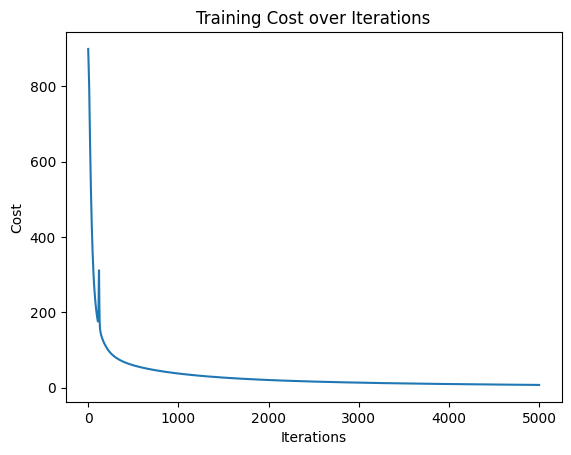

In [14]:
hidden_layer_dim = 500
output_dim = 5

w1 = set_weights(hidden_layer_dim, x_train.shape[1])
b1 = set_bias(hidden_layer_dim)

w2 = set_weights(output_dim, hidden_layer_dim)
b2 = set_bias(output_dim)

alpha = 0.10
iterations = 5000
cost_history = []
for i in range(iterations):
    z1, a1, z2, y_pred = forward_propagation(x_train, w1, b1, w2, b2)
    loss = cross_entropy(y_train, y_pred)
    cost_history.append(loss)

    # calculating gradients
    dw1, db1, dw2, db2 = backpropagation(x_train, y_train, y_pred, z1, a1, w1, w2, b1, b2)
    w1, b1, w2, b2 = update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)

    if i % 100 == 0:
        print(f"Iteration: {i}       Cost: {loss}")


plt.plot(range(0, iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Cost over Iterations')
plt.show()

In [15]:
predictions = predict(y_pred)
accu  = accuracy(y_train, predictions)
print(f"Training accuracy: {accu:.4f}%")

Training accuracy: 99.8571%


In [16]:
z1, a1, z2, pred_validation = forward_propagation(x_validation, w1, b1, w2, b2)
pred2 = predict(pred_validation)
acc2  = accuracy(y_validation, pred2)
print(f"Validation accuracy: {acc2:.4f}%")

Validation accuracy: 93.7500%


In [17]:
z1, a1, z2, pred_test= forward_propagation(x_test, w1, b1, w2, b2)
pred3 = predict(pred_test)
acc3  = accuracy(y_test, pred3)
print(f"Testing accuracy: {acc3:.4f}%")

Testing accuracy: 98.1250%
